In [7]:
import random

# Epsilon Greedy

In [19]:


def ind_max(x):
    m = max(x)
    return x.index(m)

class EpsilonGreedy():
    def __init__(self, epsilon, counts, values):
        self.epsilon = epsilon
        self.counts = counts
        self.values = values
        return

    def initialize(self, n_arms):
        self.counts = [0 for col in range(n_arms)]
        self.values = [0.0 for col in range(n_arms)]
        return

    def select_arm(self):
        if random.random() > self.epsilon:
            return ind_max(self.values)
        else:
            return random.randrange(len(self.values))
  
    def update(self, chosen_arm, reward):
        self.counts[chosen_arm] = self.counts[chosen_arm] + 1
        n = self.counts[chosen_arm]

        value = self.values[chosen_arm]
        new_value = ((n - 1) / float(n)) * value + (1 / float(n)) * reward
        self.values[chosen_arm] = new_value
        return

In [1]:
class BernoulliArm(): 
    def __init__(self, p):
        self.p = p

    def draw(self):
        if random.random() > self.p:
            return 0.0 
        else:
            return 1.0

In [8]:
means = [0.1, 0.1, 0.1, 0.1, 0.9]
n_arms = len(means)
random.shuffle(means)
arms = map(lambda mu: BernoulliArm(mu), means)

In [77]:
def test_algorithm(algo, arms, num_sims, horizon):
    chosen_arms = [0.0 for i in range(num_sims * horizon)] 
    rewards = [0.0 for i in range(num_sims * horizon)] 
    cumulative_rewards = [0.0 for i in range(num_sims * horizon)] 
    sim_nums = [0.0 for i in range(num_sims * horizon)]
    times = [0.0 for i in range(num_sims * horizon)]

    for sim in range(num_sims): 
        sim=sim+1 
        algo.initialize(len(arms))

        for t in range(horizon):
            t=t+1 
            index=(sim-1)*horizon + t-1

            sim_nums[index] = sim
            times[index] = t

            chosen_arm = algo.select_arm()
            chosen_arms[index] = chosen_arm

            reward = arms[chosen_arms[index]].draw()
            rewards[index] = reward

            if t==1: 
                cumulative_rewards[index] = reward
            else:
                cumulative_rewards[index] = cumulative_rewards[index - 1] + reward
        
            algo.update(chosen_arm, reward)

    return [sim_nums, times, chosen_arms, rewards, cumulative_rewards]

In [78]:
random.seed(1)
means = [0.1, 0.1, 0.1, 0.1, 0.9]
n_arms = len(means)
random.shuffle(means)
arms = list(map(lambda mu: BernoulliArm(mu), means))
print("Best arm is " + str(ind_max(means)))

f = open("standard_results.tsv", "w")
for epsilon in [0.1, 0.2, 0.3, 0.4, 0.5]:
    algo = EpsilonGreedy(epsilon, [], []) 
    algo.initialize(n_arms)
    results = test_algorithm(algo, arms, 5000, 250)
    for i in range(len(results[0])):
        f.write(str(epsilon) + "\t")
        f.write("\t".join([str(results[j][i]) for j in range(len(results))]) + "\n")

f.close()

Best arm is 2


In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

results = pd.read_csv("standard_results.tsv", sep='\t', header=None)
results.columns = ["Epsilon", "Sim", "T", "ChosenArm", "Reward", "CumulativeReward"]
results["Epsilon"] = results["Epsilon"].astype(float)

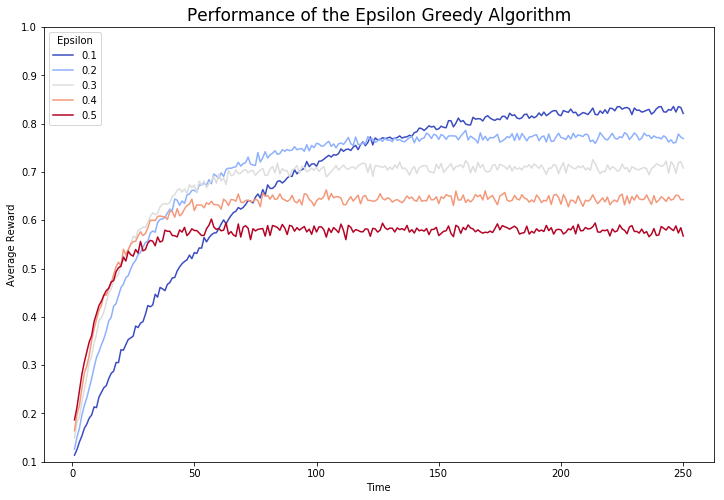

In [89]:
# Plot average reward as a function of time.

plt.figure(figsize=[12,8])
stats = results.groupby(["Epsilon", "T"])["Reward"].mean().reset_index()
sns.lineplot(x="T", y="Reward", hue="Epsilon", data=stats, palette="coolwarm")

plt.ylim(.1, 1)
plt.xlabel("Time")
plt.ylabel("Average Reward")
plt.title("Performance of the Epsilon Greedy Algorithm", fontsize=17)
plt.legend(title='Epsilon', labels=results["Epsilon"].unique())

plt.show()


## Plot frequency of selecting correct arm as a function of time. In this instance, 2 is the correct arm.

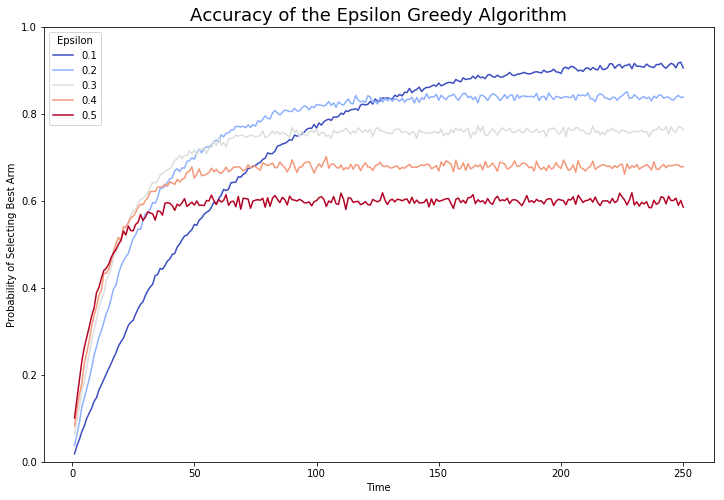

In [94]:
plt.figure(figsize=[12,8])

stats = results.groupby(["Epsilon", "T"])["ChosenArm"].apply(lambda x: np.mean(x == 2)).reset_index(name="Accuracy")
sns.lineplot(x="T", y="Accuracy", hue="Epsilon", data=stats, palette="coolwarm")

plt.ylim(0, 1)
plt.xlabel("Time")
plt.ylabel("Probability of Selecting Best Arm")
plt.title("Accuracy of the Epsilon Greedy Algorithm", fontsize=18)
plt.legend(title='Epsilon', labels=results["Epsilon"].unique())

plt.show()

## Plot variance of chosen arms as a function of time.

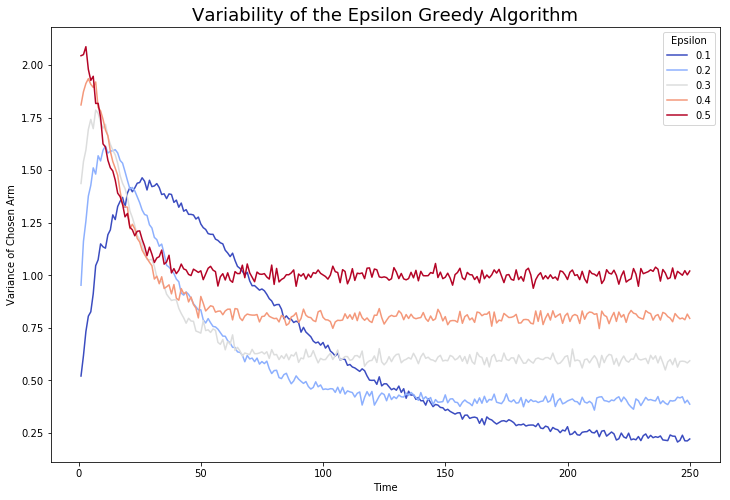

In [98]:
stats = results.groupby(["Epsilon", "T"])["ChosenArm"].var().reset_index(name="Variance")

plt.figure(figsize=[12,8])
sns.lineplot(x="T", y="Variance", hue="Epsilon", data=stats, palette="coolwarm")
plt.xlabel("Time")
plt.ylabel("Variance of Chosen Arm")
plt.title("Variability of the Epsilon Greedy Algorithm", fontsize=18)
plt.legend(title='Epsilon', labels=results["Epsilon"].unique())
plt.show()


## Plot cumulative reward as a function of time.

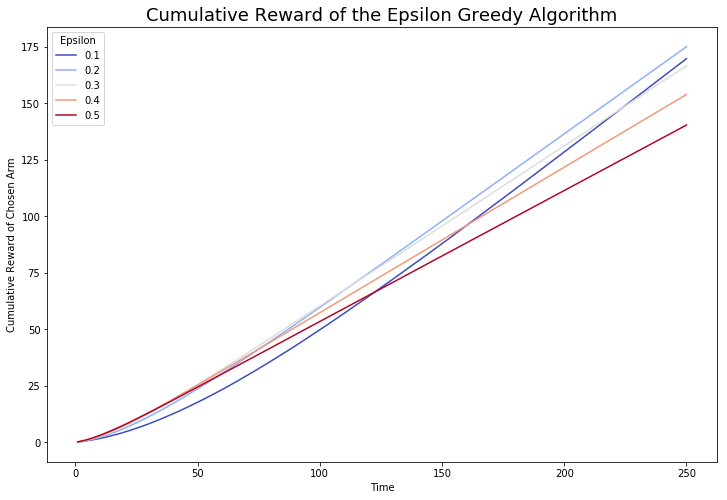

In [103]:
stats = results.groupby(["Epsilon", "T"])["CumulativeReward"].mean().reset_index()

plt.figure(figsize=[12,8])

sns.lineplot(x="T", y="CumulativeReward", hue="Epsilon", data=stats, palette="coolwarm")
plt.xlabel("Time")
plt.ylabel("Cumulative Reward of Chosen Arm")
plt.title("Cumulative Reward of the Epsilon Greedy Algorithm", fontsize=18)
plt.legend(title='Epsilon', labels=results["Epsilon"].unique())
plt.show()
